In [1]:
import pandas as pd
import numpy as np

<h5 align='right'>Open the file</h5>
<hr color='f47b0a'>

In [2]:
path = '/content/drive/MyDrive/Colab Notebooks/video_data.json'

In [3]:
df = pd.read_json(path)

In [4]:
df.head()

,kind,etag,id,snippet,contentDetails,statistics
0,youtube#video,rk4G6cjfPsJOWXfVPdyD1ucdK8M,xsPlB4WAmRc,"{'publishedAt': '2022-02-09T17:15:40Z', 'chann...","{'duration': 'PT22S', 'dimension': '2d', 'defi...","{'viewCount': '17937', 'likeCount': '683', 'fa..."
1,youtube#video,-ETeRQ5BxE40A7OwGllp8ev5KB0,q-r6V_PgtcY,"{'publishedAt': '2022-02-07T15:00:36Z', 'chann...","{'duration': 'PT6M56S', 'dimension': '2d', 'de...","{'viewCount': '44276', 'likeCount': '1648', 'f..."
2,youtube#video,fpaPdZpqU7QWwCKoI3QuyAiVeuA,jxe870HmYBE,"{'publishedAt': '2022-02-03T13:29:23Z', 'chann...","{'duration': 'PT2M6S', 'dimension': '2d', 'def...","{'viewCount': '736149', 'likeCount': '26474', ..."
3,youtube#video,mjZEl_rnfe0R5GfamSImpzajGOY,yxVOownOSRs,"{'publishedAt': '2022-02-01T17:09:05Z', 'chann...","{'duration': 'PT25S', 'dimension': '2d', 'defi...","{'viewCount': '49527', 'likeCount': '1478', 'f..."
4,youtube#video,2RCwJcwy7XNDJMOjqujRhnuN8aQ,3-yglCSCPng,"{'publishedAt': '2022-01-14T13:00:01Z', 'chann...","{'duration': 'PT22S', 'dimension': '2d', 'defi...","{'viewCount': '227869', 'likeCount': '5702', '..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5723 entries, 0 to 5722
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   kind            5723 non-null   object
 1   etag            5723 non-null   object
 2   id              5723 non-null   object
 3   snippet         5723 non-null   object
 4   contentDetails  5723 non-null   object
 5   statistics      5723 non-null   object
dtypes: object(6)
memory usage: 268.4+ KB


In [6]:
df = df.drop(columns=['etag', 'kind'])

<h5 align='right'>Select Desired Subcolumns</h5>
<hr color='f47b0a'>

In [7]:
df['snippet'][0]

{'categoryId': '17',
 'channelId': 'UCblfuW_4rakIf2h6aqANefA',
 'channelTitle': 'Red Bull',
 'defaultAudioLanguage': 'en',
 'description': '',
 'liveBroadcastContent': 'none',
 'localized': {'description': '',
  'title': 'timbersports training is wild \U0001fa9a \U0001fa93'},
 'publishedAt': '2022-02-09T17:15:40Z',
 'thumbnails': {'default': {'height': 90,
   'url': 'https://i.ytimg.com/vi/xsPlB4WAmRc/default.jpg',
   'width': 120},
  'high': {'height': 360,
   'url': 'https://i.ytimg.com/vi/xsPlB4WAmRc/hqdefault.jpg',
   'width': 480},
  'maxres': {'height': 720,
   'url': 'https://i.ytimg.com/vi/xsPlB4WAmRc/maxresdefault.jpg',
   'width': 1280},
  'medium': {'height': 180,
   'url': 'https://i.ytimg.com/vi/xsPlB4WAmRc/mqdefault.jpg',
   'width': 320},
  'standard': {'height': 480,
   'url': 'https://i.ytimg.com/vi/xsPlB4WAmRc/sddefault.jpg',
   'width': 640}},
 'title': 'timbersports training is wild \U0001fa9a \U0001fa93'}

In [8]:
mask = df['snippet'].apply(pd.Series)
df['defaultAudioLanguage'] = mask['defaultAudioLanguage']
df['title'] = mask['title']
df['publishedAt']= mask['publishedAt']
df = df.drop(columns=['snippet'])
df.head()

,id,contentDetails,statistics,defaultAudioLanguage,title,publishedAt
0,xsPlB4WAmRc,"{'duration': 'PT22S', 'dimension': '2d', 'defi...","{'viewCount': '17937', 'likeCount': '683', 'fa...",en,timbersports training is wild 🪚 🪓,2022-02-09T17:15:40Z
1,q-r6V_PgtcY,"{'duration': 'PT6M56S', 'dimension': '2d', 'de...","{'viewCount': '44276', 'likeCount': '1648', 'f...",en,Jet Boats For Breakfast & Backcountry Sled Lau...,2022-02-07T15:00:36Z
2,jxe870HmYBE,"{'duration': 'PT2M6S', 'dimension': '2d', 'def...","{'viewCount': '736149', 'likeCount': '26474', ...",en,Max Verstappen’s Icy Pre-Season Fun: Driving A...,2022-02-03T13:29:23Z
3,yxVOownOSRs,"{'duration': 'PT25S', 'dimension': '2d', 'defi...","{'viewCount': '49527', 'likeCount': '1478', 'f...",en,which runner are you? 🏃‍♀️,2022-02-01T17:09:05Z
4,3-yglCSCPng,"{'duration': 'PT22S', 'dimension': '2d', 'defi...","{'viewCount': '227869', 'likeCount': '5702', '...",en,incredible skiing skills that just look ✨ casu...,2022-01-14T13:00:01Z


In [9]:
df['statistics'][0]

{'commentCount': '12',
 'favoriteCount': '0',
 'likeCount': '683',
 'viewCount': '17937'}

In [10]:
mask2 = df['statistics'].apply(pd.Series)
df['commentCount'] = mask2['commentCount']
df['favoriteCount'] = mask2['favoriteCount']
df['likeCount'] = mask2['likeCount']
df['viewCount'] = mask2['viewCount']
df= df.drop(columns=['statistics'])
df.head()

,id,contentDetails,defaultAudioLanguage,title,publishedAt,commentCount,favoriteCount,likeCount,viewCount
0,xsPlB4WAmRc,"{'duration': 'PT22S', 'dimension': '2d', 'defi...",en,timbersports training is wild 🪚 🪓,2022-02-09T17:15:40Z,12,0,683,17937
1,q-r6V_PgtcY,"{'duration': 'PT6M56S', 'dimension': '2d', 'de...",en,Jet Boats For Breakfast & Backcountry Sled Lau...,2022-02-07T15:00:36Z,78,0,1648,44276
2,jxe870HmYBE,"{'duration': 'PT2M6S', 'dimension': '2d', 'def...",en,Max Verstappen’s Icy Pre-Season Fun: Driving A...,2022-02-03T13:29:23Z,1064,0,26474,736149
3,yxVOownOSRs,"{'duration': 'PT25S', 'dimension': '2d', 'defi...",en,which runner are you? 🏃‍♀️,2022-02-01T17:09:05Z,61,0,1478,49527
4,3-yglCSCPng,"{'duration': 'PT22S', 'dimension': '2d', 'defi...",en,incredible skiing skills that just look ✨ casu...,2022-01-14T13:00:01Z,43,0,5702,227869


In [11]:
df['contentDetails'][0]

{'caption': 'false',
 'contentRating': {},
 'definition': 'hd',
 'dimension': '2d',
 'duration': 'PT22S',
 'licensedContent': False,
 'projection': 'rectangular'}

In [12]:
mask3 = df['contentDetails'].apply(pd.Series)
df['definition'] = mask3['definition']
df['duration'] = mask3['duration']
df= df.drop(columns=['contentDetails'])

In [13]:
df.head()

,id,defaultAudioLanguage,title,publishedAt,commentCount,favoriteCount,likeCount,viewCount,definition,duration
0,xsPlB4WAmRc,en,timbersports training is wild 🪚 🪓,2022-02-09T17:15:40Z,12,0,683,17937,hd,PT22S
1,q-r6V_PgtcY,en,Jet Boats For Breakfast & Backcountry Sled Lau...,2022-02-07T15:00:36Z,78,0,1648,44276,hd,PT6M56S
2,jxe870HmYBE,en,Max Verstappen’s Icy Pre-Season Fun: Driving A...,2022-02-03T13:29:23Z,1064,0,26474,736149,hd,PT2M6S
3,yxVOownOSRs,en,which runner are you? 🏃‍♀️,2022-02-01T17:09:05Z,61,0,1478,49527,hd,PT25S
4,3-yglCSCPng,en,incredible skiing skills that just look ✨ casu...,2022-01-14T13:00:01Z,43,0,5702,227869,hd,PT22S


<h5 align='right'>Investigate a null columns e fill the NaN</h5>
<hr color='f47b0a'>

In [37]:
df['favoriteCount'].isnull().value_counts()

KeyError: ignored

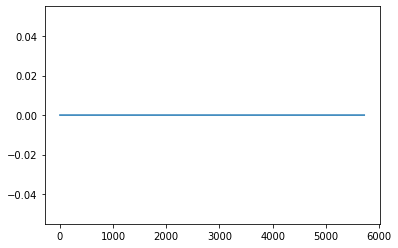

In [14]:
df['favoriteCount'].astype(int).plot()

In [15]:
df=df.drop(columns=['favoriteCount'])

In [23]:
df.isna().value_counts()

id     defaultAudioLanguage  title  publishedAt  commentCount  likeCount  viewCount  definition  duration
False  True                  False  False        False         False      False      False       False       3955
       False                 False  False        False         False      False      False       False       1764
                                                 True          False      False      False       False          2
       True                  False  False        False         True       False      False       False          2
dtype: int64

In [24]:
df=df.fillna(0)

<h5 align='right'>Change the data type</h5>
<hr color='f47b0a'>

In [35]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'], infer_datetime_format=True)
df['publishedAt'] = df['publishedAt'].dt.tz_localize(None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5723 entries, 0 to 5722
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    5723 non-null   object        
 1   defaultAudioLanguage  5723 non-null   object        
 2   title                 5723 non-null   object        
 3   publishedAt           5723 non-null   datetime64[ns]
 4   commentCount          5723 non-null   int64         
 5   likeCount             5723 non-null   int64         
 6   viewCount             5723 non-null   int64         
 7   definition            5723 non-null   object        
 8   duration              5723 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 402.5+ KB


In [25]:
df['likeCount'] = df['likeCount'].astype(int)
df['commentCount'] =df['commentCount'].astype(int)
df['viewCount'] =df['viewCount'].astype(int)
df.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5723 entries, 0 to 5722
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   id                    5723 non-null   object             
 1   defaultAudioLanguage  5723 non-null   object             
 2   title                 5723 non-null   object             
 3   publishedAt           5723 non-null   datetime64[ns, UTC]
 4   commentCount          5723 non-null   int64              
 5   likeCount             5723 non-null   int64              
 6   viewCount             5723 non-null   int64              
 7   definition            5723 non-null   object             
 8   duration              5723 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 402.5+ KB


<h5 align='right'>Save the new dataset</h5>
<hr color='f47b0a'>

In [36]:
df.to_excel(r'/content/drive/MyDrive/Colab Notebooks/video_data_clean.xlsx',
            index = False, header=True)
